<a href="https://colab.research.google.com/github/Stephen-Kamau/Group2_Learning_and_adaptive_system/blob/main/TASK_A_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports 
import random
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import random
warnings.filterwarnings("ignore")
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score

# models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization, LeakyReLU
import tensorflow as tf
import numpy as np

In [ ]:
# loading mnist dataset
data = datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
# check all data present.. whether train or test present
len(data)

2

In [ ]:
# loading train and test
(xtrain, ytrain), (xtest, ytest) = datasets.mnist.load_data()

In [ ]:
# Check data Dimensions
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# create train and test dataset
(train , ytrain),(test,ytest)= datasets.mnist.load_data()

In [ ]:
# check shape
train.shape , ytrain.shape , test.shape , ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
#normalize and change dtype
#pixels ranges from 0 - 255
#maximum pixel is 255 thats why we are dividing by 255
train = train.astype('float32') / 255.0
test = test.astype('float32') / 255.0

In [ ]:
#class names 
class_names  = [
                'Zero' , 'One',
                'Two' , 'Three' , 'Four',
                'Five' , 'Six' , 'Seven' , 'Eight' , 'Nine'
]

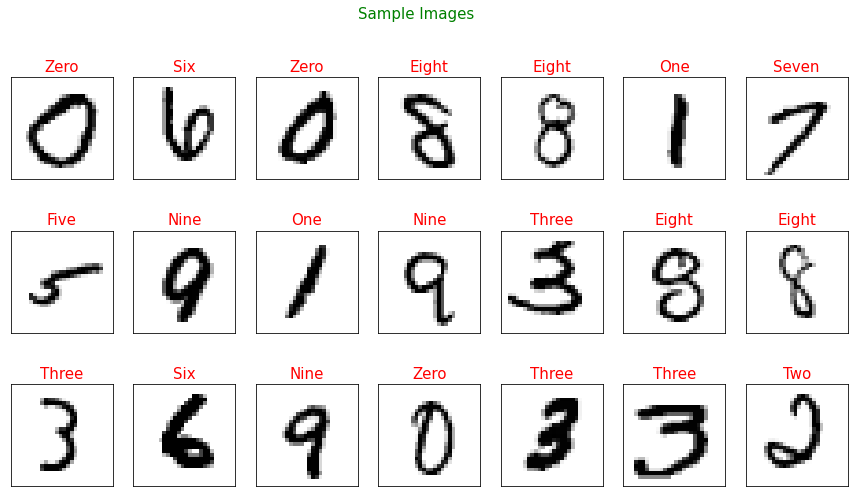

In [ ]:


# sample images
fig=plt.figure(figsize=(15, 8))
for i in range(21):
    # get a random index
    n =random.randint(0,50000)
    plt.subplot(3,7, i+1)
    plt.subplot(3,7,i+1).set_title(class_names[ytrain[n]] ,   c='r' , fontsize=15)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train[n] , cmap=plt.cm.binary)
plt.suptitle("Sample Images" , c='g' , fontsize=15)
plt.show()

In [ ]:
# split dataset for train and validation
# validation set is 15% of train
X_train, Xval, y_train, yval = train_test_split(
    train, 
    ytrain, 
    random_state=42, 
    test_size=0.15,
)

In [ ]:
#outputs/print
X_train.shape, Xval.shape, y_train.shape, yval.shape

((51000, 28, 28), (9000, 28, 28), (51000,), (9000,))

In [ ]:
#input dimensions(28 x 28)
input_dim =  X_train.shape[1:]

In [ ]:
#outputs/print
X_train.shape , input_dim

((51000, 28, 28), (28, 28))

In [ ]:
#define sequential  : 4 layers ; input layer-dense, flattening, dense, output layer-Dense 
model = Sequential()
model.add(Dense(784, activation='relu', input_shape = input_dim))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
#output layer (10 output as the size of classes is 10) 
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 784)           22736     
                                                                 
 flatten (Flatten)           (None, 21952)             0         
                                                                 
 dense_1 (Dense)             (None, 100)               2195300   
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 2,219,046
Trainable params: 2,219,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(f"The Number of Layers for model1 are  {len(model.layers)}")

The Number of Layers for model1 are  4


In [ ]:
# Start training with 20 epochs

history1 = model.fit(X_train, 
           y_train, 
           batch_size=128, 
           epochs=20, 
           validation_data=(Xval, yval))

Epoch 1/20
399/399 [==============================] - 9s 11ms/step - loss: 0.2297 - accuracy: 0.9316 - val_loss: 0.1243 - val_accuracy: 0.9631
Epoch 2/20
399/399 [==============================] - 4s 10ms/step - loss: 0.0978 - accuracy: 0.9703 - val_loss: 0.0968 - val_accuracy: 0.9703
Epoch 3/20
399/399 [==============================] - 4s 10ms/step - loss: 0.0671 - accuracy: 0.9796 - val_loss: 0.0901 - val_accuracy: 0.9731
Epoch 4/20
399/399 [==============================] - 4s 9ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0825 - val_accuracy: 0.9759
Epoch 5/20
399/399 [==============================] - 4s 9ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0770 - val_accuracy: 0.9784
Epoch 6/20
399/399 [==============================] - 4s 10ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0862 - val_accuracy: 0.9776
Epoch 7/20
399/399 [==============================] - 4s 9ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0894 - val_accuracy: 0.9756
Ep

In [ ]:
# check model1 score
print("************RESULTS*******************")
loss, acc = model.evaluate(test, ytest, verbose=0)
print(f'\n\nAccuracy  {(acc * 100.0)}')
print(f'Loss  {(loss * 100.0)}')

************RESULTS*******************


Accuracy  97.76999950408936
Loss  11.086595803499222


In [ ]:
# history1.history['loss']

In [ ]:
# loss plot and accuracy plot
def getGraphsForModel(history):
  """
  Draws a graph for the results
  """
  fig, axes = plt.subplots(1, 2 , figsize=(16,7))
  axes[0].set_title('Loss' , c='r' , fontsize=15)
  axes[0].plot(history.history['loss'], color='blue', label='train loss')
  axes[0].plot(history.history['val_loss'], color='orange', label='val loss')

  axes[0].legend(loc='best')
  axes[1].set_title('Classification Accuracy' , c ='r' , fontsize=15)
  axes[1].plot(history.history['accuracy'], color='blue', label='train accuracy')
  axes[1].plot(history.history['val_accuracy'], color='orange', label='val accuracy')
  axes[1].legend(loc = "best")

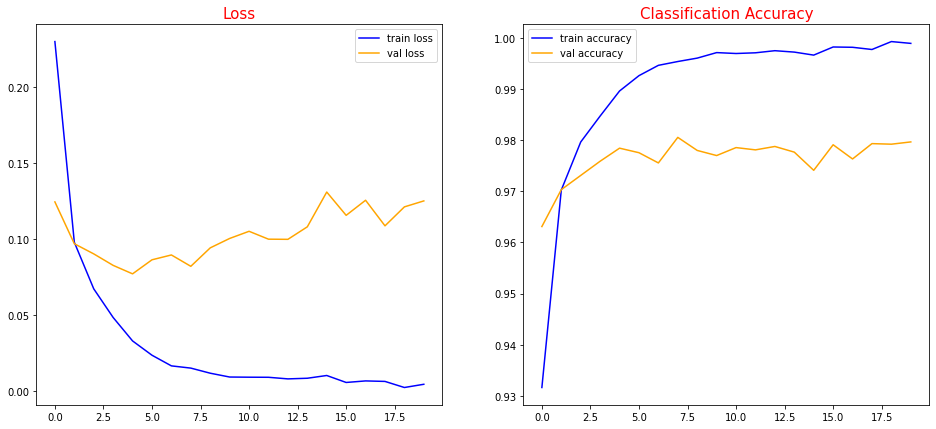

In [ ]:
#plots
getGraphsForModel(history1)
plt.savefig("model1.png")

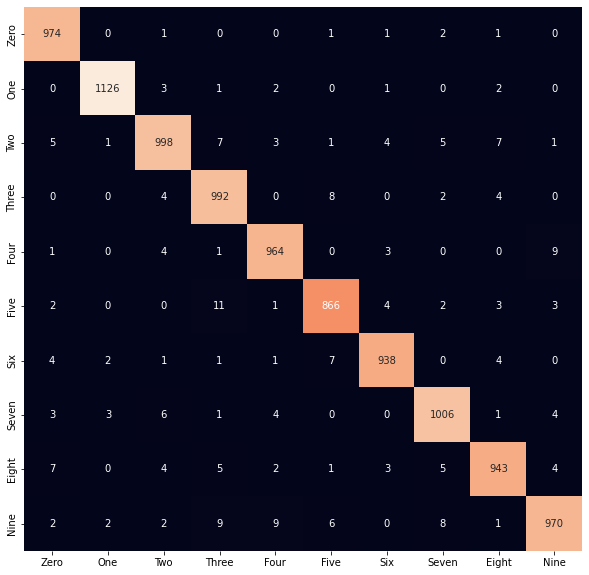

In [ ]:
#Confusion matrix to display our labels against predictions
cnn_mat = confusion_matrix(ytest, np.argmax(model.predict(test) , axis =1))

class_names = class_names

plt.figure(figsize=(10 , 10))
sns.heatmap(cnn_mat ,     
            fmt ='g',
            cbar=False,
            annot=True , 
            xticklabels=class_names,
            yticklabels=class_names
            )

In [ ]:
# get information for (4, 6, 9) labels and predictions
#represents items whose labels are initially 4
original_index4 = np.where(ytest ==4)
#represents items predicted as 4 by our model
predicted_index4 = np.where(np.argmax(model.predict(test), axis=1) ==4)


original_index6 = np.where(ytest ==6)
predicted_index6 = np.where(np.argmax(model.predict(test), axis=1) ==6)


original_index9 = np.where(ytest ==9)
predicted_index9 = np.where(np.argmax(model.predict(test), axis=1) ==9)

In [ ]:
# 4 predicted as 9
missed_index =[]
for pred9 in predicted_index9[0]:
  if pred9 in original_index4[0]:
    missed_index.append(pred9)

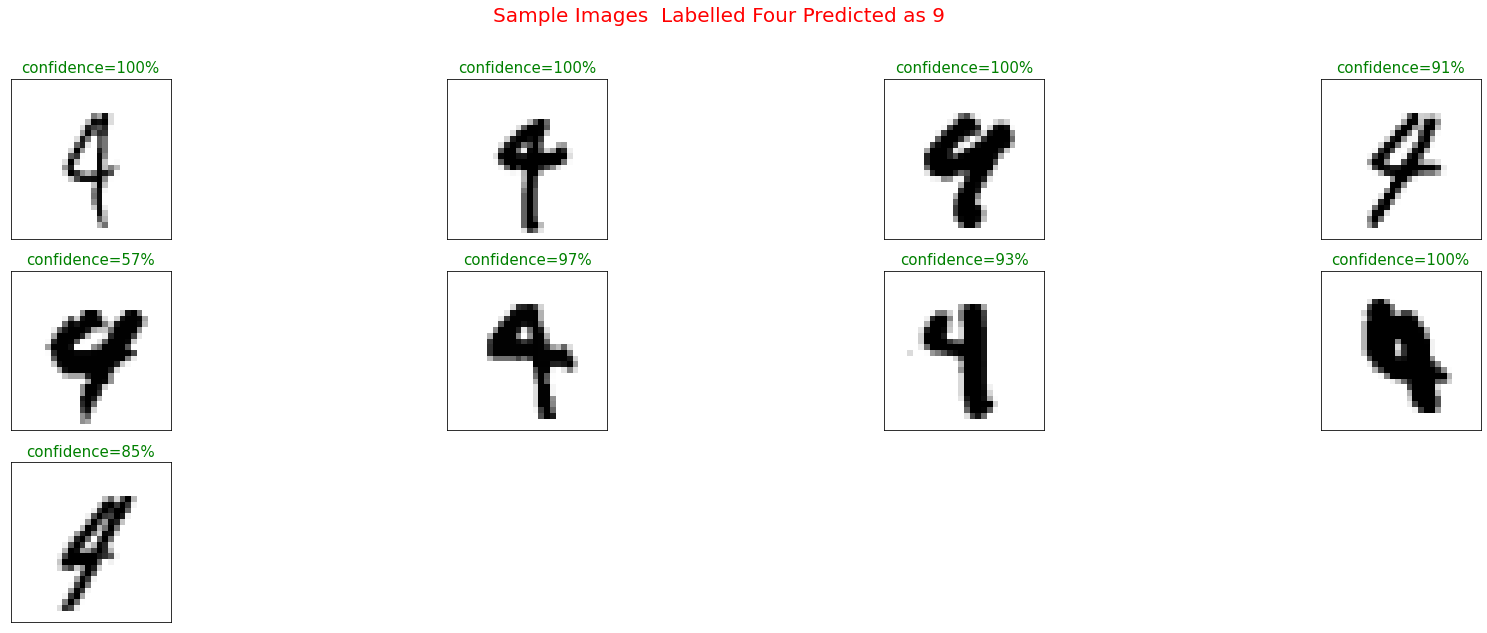

In [ ]:
#plots of 4s predicted as 9s

fig=plt.figure(figsize=(30, 10))
for i in range(len(missed_index)):
    img = test[missed_index[i]]
    preds = model.predict(img.reshape(-1,28,28)) 
    ori_lbl = class_names[ytest[missed_index[i]]]
    pre_lbl = preds.argmax()
    plt.subplot(3,4, i+1)
    plt.subplot(3,4,i+1).set_title(f"confidence={round(preds.max()*100)}%" ,   c='g' , fontsize=15)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
plt.suptitle("Sample Images  Labelled Four Predicted as 9" , c='r' , fontsize=20)
plt.show()

In [ ]:

# 9s predicted as 4s
missed_index94 =[]
for pred4 in predicted_index4[0]:
  if pred4 in original_index9[0]:
    missed_index94.append(pred4)

In [ ]:
#length of list
len(missed_index94)

9

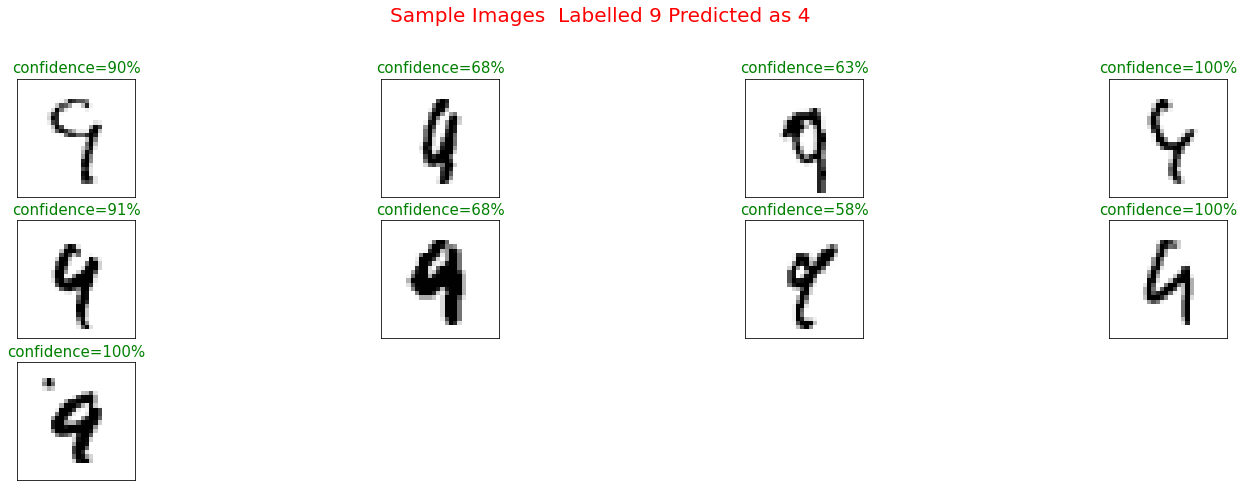

In [ ]:
#plots for 9s predicted as 4s
fig=plt.figure(figsize=(25, 10))
for i in range(len(missed_index94)):
    img = test[missed_index94[i]]
    preds = model.predict(img.reshape(-1,28,28)) 
    ori_lbl = class_names[ytest[missed_index94[i]]]
    pre_lbl = preds.argmax()
    plt.subplot(4,4, i+1)
    plt.subplot(4,4,i+1).set_title(f"confidence={round(preds.max()*100)}%" ,   c='g' , fontsize=15)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
plt.suptitle("Sample Images  Labelled 9 Predicted as 4" , c='r' , fontsize=20)
plt.show()

In [ ]:
# 4s predicted as 6s
missed_index46 =[]
for pred6 in predicted_index6[0]:
  if pred6 in original_index4[0]:
    missed_index46.append(pred6)

In [ ]:
len(missed_index46)

3

In [ ]:
# 6s predicted as 4s
missed_index64 =[]
for pred4 in predicted_index4[0]:
  if pred4 in original_index6[0]:
    missed_index64.append(pred4)

In [ ]:
len(missed_index64)

1